In [1]:
import os
os.chdir("../../")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as np
import pandas as pd
import surgeon

Using TensorFlow backend.
/home/mohsen/miniconda3/envs/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mohsen/miniconda3/envs/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mohsen/miniconda3/envs/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mohsen/miniconda3

In [3]:
sns.set(style="whitegrid")

In [4]:
data_name = "pbmc_subset"
data_type = "normalized"

# scNet scores

In [5]:
scnet_freezed0 = pd.read_csv(f"./results/convergence/{data_name}/scores_scNet_freeze_level=0_{data_type}.log")
scnet_freezed0['Architecture'] = "Freeze Level = 0 scNet"
scnet_freezed0.head()

,epoch,time,ASW,ARI,NMI,EBM,KNN,Architecture
0,0,0.000000,0.069044,0.390958,0.498532,0.660891,0.595683,Freeze Level = 0 scNet
1,5,0.183644,0.071588,0.402430,0.516318,0.657166,0.600947,Freeze Level = 0 scNet
2,10,0.366615,0.071612,0.403834,0.515230,0.660947,0.602160,Freeze Level = 0 scNet
3,15,0.556225,0.069870,0.402491,0.515703,0.657104,0.602897,Freeze Level = 0 scNet
4,20,0.743548,0.068775,0.378803,0.502674,0.658027,0.599590,Freeze Level = 0 scNet


In [6]:
scnet_freezed1 = pd.read_csv(f"./results/convergence/{data_name}/scores_scNet_freeze_level=1_{data_type}.log")
scnet_freezed1['Architecture'] = "Freeze Level = 1 scNet"
scnet_freezed1.head()

,epoch,time,ASW,ARI,NMI,EBM,KNN,Architecture
0,0,0.000000,0.073455,0.295621,0.422157,0.660675,0.576309,Freeze Level = 1 scNet
1,5,0.176006,0.077811,0.353638,0.493836,0.659924,0.605073,Freeze Level = 1 scNet
2,10,0.350922,0.077416,0.374132,0.504232,0.659282,0.608593,Freeze Level = 1 scNet
3,15,0.520332,0.078886,0.373551,0.508916,0.654986,0.610880,Freeze Level = 1 scNet
4,20,0.694019,0.078016,0.367422,0.498923,0.660383,0.607344,Freeze Level = 1 scNet


In [7]:
scnet_freezed2 = pd.read_csv(f"./results/convergence/{data_name}/scores_scNet_freeze_level=2_{data_type}.log")
scnet_freezed2['Architecture'] = "Freeze Level = 2 scNet"
scnet_freezed2 = scnet_freezed2.iloc[:300, :]
scnet_freezed2.head()

,epoch,time,ASW,ARI,NMI,EBM,KNN,Architecture
0,0,0.000000,0.063326,0.308249,0.437490,0.660042,0.577842,Freeze Level = 2 scNet
1,5,0.178144,0.063960,0.307541,0.436741,0.658340,0.578282,Freeze Level = 2 scNet
2,10,0.356380,0.064581,0.307152,0.434973,0.659905,0.578481,Freeze Level = 2 scNet
3,15,0.533646,0.065189,0.307498,0.436214,0.661242,0.578422,Freeze Level = 2 scNet
4,20,0.716022,0.065819,0.303247,0.433229,0.655406,0.577728,Freeze Level = 2 scNet


# scVI scores

In [8]:
scvi_scores = pd.read_csv(f"./results/convergence/{data_name}/scVI.csv")
scvi_scores['Architecture'] = "scVI"
scvi_scores['time'] = scvi_scores['Elapsed Time']
scvi_scores['EBM'] = scvi_scores['EBM_15']
scvi_scores['KNN'] = scvi_scores['KNN_15']
scvi_scores.head()

,Epoch,Elapsed Time,ASW,NMI,ARI,EBM_15,EBM_25,EBM_50,EBM_100,EBM_200,...,KNN_15,KNN_25,KNN_50,KNN_100,KNN_200,KNN_300,Architecture,time,EBM,KNN
0,0,0.233141,0.096755,0.304555,0.163489,0.383745,0.406253,0.431685,0.456366,0.483683,...,0.385655,0.371971,0.348664,0.326954,0.304089,0.287066,scVI,0.233141,0.383745,0.385655
1,5,1.073381,0.140728,0.505000,0.357693,0.323987,0.348029,0.381093,0.408185,0.442165,...,0.496067,0.488910,0.463154,0.422470,0.390884,0.374705,scVI,1.073381,0.323987,0.496067
2,10,1.935529,0.122705,0.516369,0.362500,0.318087,0.341316,0.363324,0.400291,0.438383,...,0.520486,0.511773,0.482025,0.434489,0.400397,0.382358,scVI,1.935529,0.318087,0.520486
3,15,2.751526,0.115359,0.504756,0.355450,0.310561,0.335345,0.367449,0.394157,0.430351,...,0.524938,0.516187,0.490536,0.439396,0.403546,0.383366,scVI,2.751526,0.310561,0.524938
4,20,3.596724,0.109342,0.496663,0.346788,0.310484,0.337664,0.360278,0.402395,0.437534,...,0.530965,0.524089,0.494207,0.443990,0.405367,0.383701,scVI,3.596724,0.310484,0.530965


# Integrate scores

In [9]:
df = pd.concat([scnet_freezed0,
                scnet_freezed1,
                scnet_freezed2,
                scvi_scores])
df.head()

/home/mohsen/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,ARI,ASW,Architecture,EBM,EBM_100,EBM_15,EBM_200,EBM_25,EBM_300,EBM_50,...,KNN,KNN_100,KNN_15,KNN_200,KNN_25,KNN_300,KNN_50,NMI,epoch,time
0,0.390958,0.069044,Freeze Level = 0 scNet,0.660891,NaN,NaN,NaN,NaN,NaN,NaN,...,0.595683,NaN,NaN,NaN,NaN,NaN,NaN,0.498532,0.0,0.000000
1,0.402430,0.071588,Freeze Level = 0 scNet,0.657166,NaN,NaN,NaN,NaN,NaN,NaN,...,0.600947,NaN,NaN,NaN,NaN,NaN,NaN,0.516318,5.0,0.183644
2,0.403834,0.071612,Freeze Level = 0 scNet,0.660947,NaN,NaN,NaN,NaN,NaN,NaN,...,0.602160,NaN,NaN,NaN,NaN,NaN,NaN,0.515230,10.0,0.366615
3,0.402491,0.069870,Freeze Level = 0 scNet,0.657104,NaN,NaN,NaN,NaN,NaN,NaN,...,0.602897,NaN,NaN,NaN,NaN,NaN,NaN,0.515703,15.0,0.556225
4,0.378803,0.068775,Freeze Level = 0 scNet,0.658027,NaN,NaN,NaN,NaN,NaN,NaN,...,0.599590,NaN,NaN,NaN,NaN,NaN,NaN,0.502674,20.0,0.743548


# Convergence plot 

In [10]:
sns.set()

In [11]:
import matplotlib
font = {'family' : 'Arial',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=22)
matplotlib.rc('xtick', labelsize=22)

In [12]:
metrics = ["ASW", "ARI", "NMI", "KNN", "EBM"]

/home/mohsen/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 864x576 with 0 Axes>

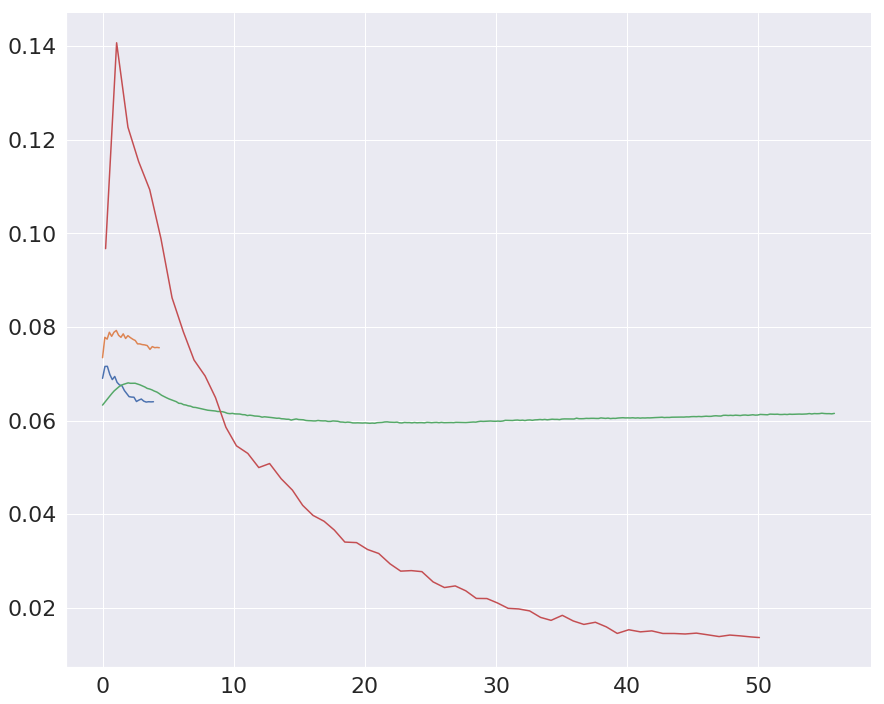

<Figure size 864x576 with 0 Axes>

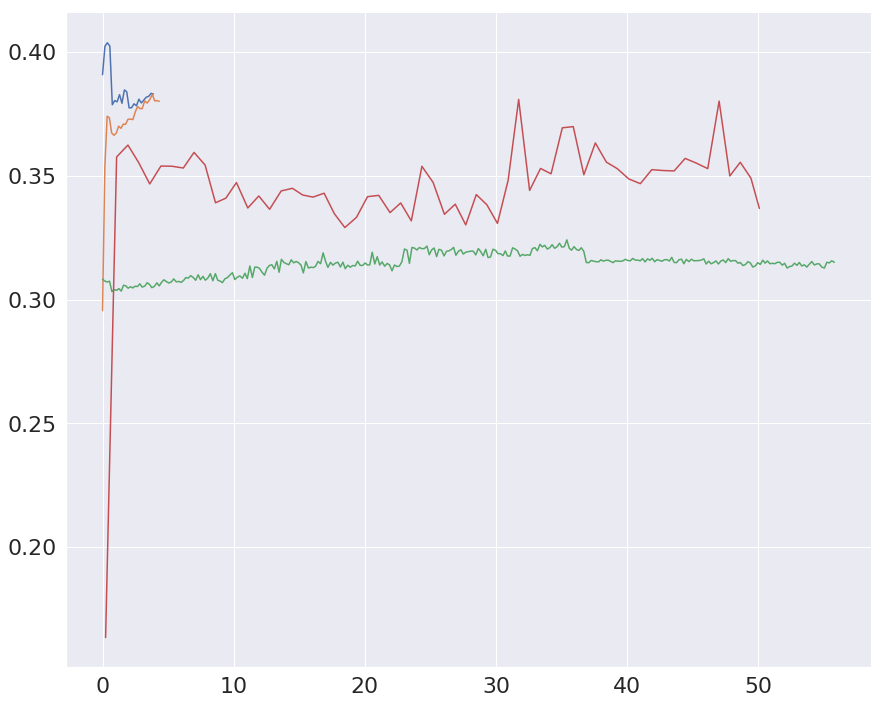

<Figure size 864x576 with 0 Axes>

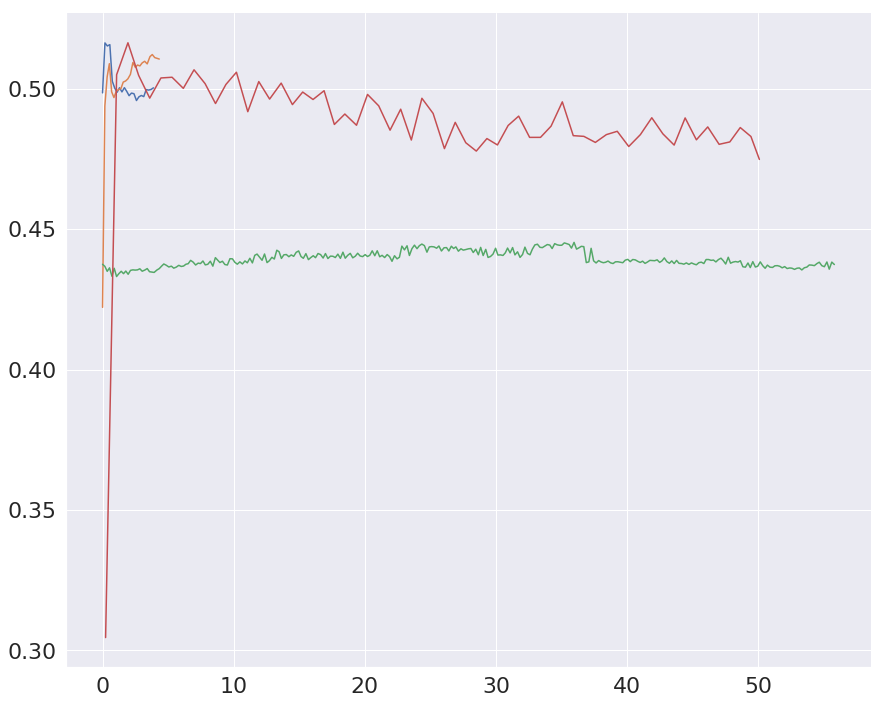

<Figure size 864x576 with 0 Axes>

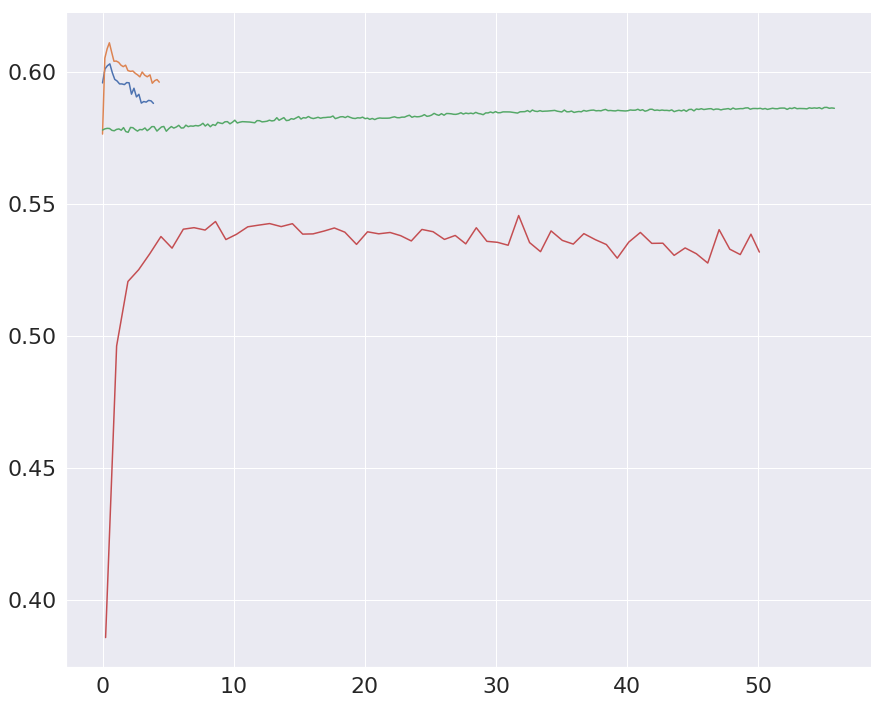

<Figure size 864x576 with 0 Axes>

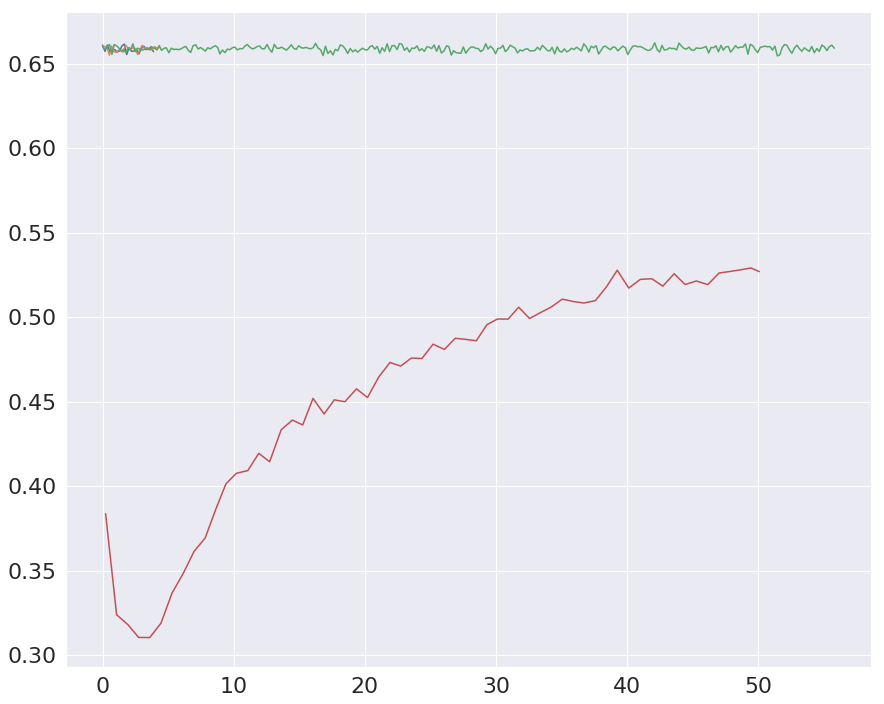

In [13]:
for metric in metrics:
    plt.close("all")
    plt.figure(figsize=(12, 8))
    g = sns.relplot(x="time", y=metric,
                    hue="Architecture", 
                    sizes=[1000, 10, 10],
                    height=10, aspect=1.25, legend=False,
                    kind="line", data=df)
    plt.xlabel("")
    plt.ylabel("")
#     g.despine(left=True)
#     plt.legend(bbox_to_anchor=(1.05,0.5), borderaxespad=0, loc='center left', prop={'size': 18})
    plt.tight_layout()
    plt.savefig(f"./results/convergence/{data_name}/{metric}.pdf", dpi=300)
    plt.show()